In [1]:
  #que :What is the shape of "movies.csv"?

import pandas as pd

# Load the CSV file
movies = pd.read_csv('movies.csv')

# Print the shape
print(movies.shape)

(9742, 3)


In [3]:
#que:What is the shape of "ratings.csv"?

import pandas as pd

# Load the CSV file
ratings = pd.read_csv('ratings.csv')

# Print the shape
print(ratings.shape)


(100836, 4)


In [4]:
#que :How many unique "userId" are available in "ratings.csv"?
*
import pandas as pd

# Load the CSV file
ratings = pd.read_csv('ratings.csv')

# Get the number of unique userId values
unique_user_ids = ratings['userId'].nunique()
print(unique_user_ids)



610


In [5]:
#que:Which movie has recieved maximum number of user ratings?
import pandas as pd

# Load the CSV files
ratings = pd.read_csv('ratings.csv')
movies = pd.read_csv('movies.csv')

# Count the number of ratings for each movie
rating_counts = ratings['movieId'].value_counts()

# Get the movieId with the maximum number of ratings
most_rated_movie_id = rating_counts.idxmax()

# Find the movie title corresponding to this movieId
most_rated_movie = movies[movies['movieId'] == most_rated_movie_id]

print(most_rated_movie)


     movieId                title                    genres
314      356  Forrest Gump (1994)  Comedy|Drama|Romance|War


In [6]:
#que: Select all the correct tags submitted by users to "Matrix, The (1999)" movie?
import pandas as pd

# Load the CSV files
movies = pd.read_csv('movies.csv')
tags = pd.read_csv('tags.csv')

# Identify the movieId for "Matrix, The (1999)"
matrix_movie_id = movies[movies['title'] == 'Matrix, The (1999)']['movieId'].values[0]

# Filter tags for this movieId
matrix_tags = tags[tags['movieId'] == matrix_movie_id]

print(matrix_tags['tag'].tolist())


['martial arts', 'sci-fi', 'alternate universe', 'philosophy', 'post apocalyptic']


In [7]:
#que :What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?
import pandas as pd

# Load the CSV files
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')

# Identify the movieId for "Terminator 2: Judgment Day (1991)"
terminator_movie_id = movies[movies['title'] == 'Terminator 2: Judgment Day (1991)']['movieId'].values[0]

# Filter ratings for this movieId
terminator_ratings = ratings[ratings['movieId'] == terminator_movie_id]

# Calculate the average rating
average_rating = terminator_ratings['rating'].mean()

print(f"The average rating for 'Terminator 2: Judgment Day (1991)' is {average_rating:.2f}")


The average rating for 'Terminator 2: Judgment Day (1991)' is 3.97


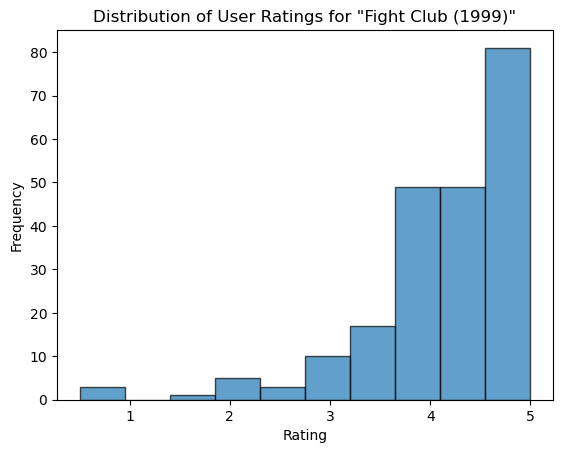

In [8]:
#que:How does the data distribution of user ratings for "Fight Club (1999)" movie looks like?

import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV files
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')

# Identify the movieId for "Fight Club (1999)"
fight_club_movie_id = movies[movies['title'] == 'Fight Club (1999)']['movieId'].values[0]

# Filter ratings for this movieId
fight_club_ratings = ratings[ratings['movieId'] == fight_club_movie_id]

# Plot the distribution of ratings
plt.hist(fight_club_ratings['rating'], bins=10, edgecolor='k', alpha=0.7)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of User Ratings for "Fight Club (1999)"')
plt.show()


In [10]:
#Test 2nd    🟢 IMPORTANT NOTE 1 🟢
#Now that you have a good enough understanding of the given data, apply the "Mandatory Operation" given below before solving any of the following questions.

#Mandatory Operations:
#1. Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings. 
#2. Apply inner join on dataframe created from movies.csv and the grouped df from step 1.
#3. Filter only those movies which have more than 50 user ratings (i.e. > 50).

#Above steps will make sure that your data contains only those movies which has recieved more than 50 user ratings.
#which movie is the most popular based on  average user ratings?

#Answer this question only after applying the above mentioned "Mandatory Operration".

import pandas as pd

# Load the CSV files
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')

# Step 1: Group by movieId and calculate count and mean of ratings
rating_summary = ratings.groupby('movieId')['rating'].agg(['count', 'mean'])

# Step 2: Merge with movies dataframe
movies_with_ratings = pd.merge(movies, rating_summary, on='movieId')

# Step 3: Filter movies with more than 50 ratings
popular_movies = movies_with_ratings[movies_with_ratings['count'] > 50]

# Step 4: Find the movie with the highest average rating
most_popular_movie = popular_movies.loc[popular_movies['mean'].idxmax()]

print(most_popular_movie)


movieId                                 318
title      Shawshank Redemption, The (1994)
genres                          Crime|Drama
count                                   317
mean                               4.429022
Name: 277, dtype: object


In [12]:
#Now that you have a good enough understanding of the given data, apply the "Mandatory Operation" given below before solving any of the following questions.

#Mandatory Operations:
#1. Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings. 
#2. Apply inner join on dataframe created from movies.csv and the grouped df from step 1.
#3. Filter only those movies which have more than 50 user ratings (i.e. > 50).

#Above steps will make sure that your data contains only those movies which has recieved more than 50 user ratings.

#que :Select all the correct options which comes under top 5 popular movies based on number of user ratings.

#Answer this question only after applying the above mentioned "Mandatory Operration".
import pandas as pd

# Load the CSV files
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')

# Group ratings by movieId and calculate count and mean
rating_stats = ratings.groupby('movieId')['rating'].agg(['count', 'mean'])

# Filter movies with more than 50 ratings
popular_movies = rating_stats[rating_stats['count'] > 50]

# Join with movie details
popular_movies = popular_movies.merge(movies, on='movieId')

# Get the top 5 movies based on number of ratings
top_5_popular_movies = popular_movies.sort_values(by='count', ascending=False).head(5)

# Print top 5 popular movies
print(top_5_popular_movies[['title', 'count', 'mean']])




                                title  count      mean
61                Forrest Gump (1994)    329  4.164134
53   Shawshank Redemption, The (1994)    317  4.429022
49                Pulp Fiction (1994)    307  4.197068
99   Silence of the Lambs, The (1991)    279  4.161290
248                Matrix, The (1999)    278  4.192446


In [14]:
#Now that you have a good enough understanding of the given data, apply the "Mandatory Operation" given below before solving any of the following questions.

#Mandatory Operations:
#1. Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings. 
#2. Apply inner join on dataframe created from movies.csv and the grouped df from step 1.
#3. Filter only those movies which have more than 50 user ratings (i.e. > 50).

#Above steps will make sure that your data contains only those movies which has recieved more than 50 user ratings.




#QUE:    Which Sci-Fi movie is "third most popular" based on the number of user ratings?

#Answer this question only after applying the above mentioned "Mandatory Operration".
import pandas as pd

# Load the CSV files
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')

# Group by movieId and calculate count and mean of ratings
ratings_agg = ratings.groupby('movieId').agg({'rating': ['count', 'mean']}).reset_index()
ratings_agg.columns = ['movieId', 'rating_count', 'rating_mean']

# Join with movies data
movies_ratings = pd.merge(movies, ratings_agg, on='movieId')

# Filter movies with more than 50 ratings
popular_movies = movies_ratings[movies_ratings['rating_count'] > 50]

# Sort by rating_count in descending order
sorted_movies = popular_movies.sort_values(by='rating_count', ascending=False)

# Filter for Sci-Fi genre
sci_fi_movies = sorted_movies[sorted_movies['genres'].str.contains('Sci-Fi')]

# Get the third most popular Sci-Fi movie
third_most_popular_sci_fi = sci_fi_movies.iloc[2]

print(third_most_popular_sci_fi[['title', 'rating_count']])



title           Jurassic Park (1993)
rating_count                     238
Name: 418, dtype: object


In [ ]:
#You already have a subset of data containing only those movies which has recieved more than 50 user ratings.

#Using "links.csv", scrape the IMDB reviews of each movie with more than 50 user ratings. "README.md" file contains the required details.

#If you are unable to write the webscraping script yourself, you can request the same by commenting LinkedIn Post.


# QUE : Mention the movieId of the movie which has the highest IMDB rating.




#STEP1
 import pandas as pd

# Load CSV files
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')
links = pd.read_csv('links.csv')

# Group by movieId and calculate count and mean of ratings
ratings_agg = ratings.groupby('movieId').agg({'rating': ['count', 'mean']}).reset_index()
ratings_agg.columns = ['movieId', 'rating_count', 'rating_mean']

# Join movies with aggregated ratings data
movies_ratings = pd.merge(movies, ratings_agg, on='movieId')

# Filter movies with more than 50 ratings
popular_movies = movies_ratings[movies_ratings['rating_count'] > 50]

# Merge with links.csv to get IMDb IDs
popular_movies_with_links = pd.merge(popular_movies, links, on='movieId')



#STEP2:


import requests
from bs4 import BeautifulSoup

# Function to scrape IMDb rating for a given movieId
def scrape_imdb_rating(imdb_id):
    url = f'https://www.imdb.com/title/tt{imdb_id}/'
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Example selector; change based on IMDb page structure
    rating = soup.find('span', {'class': 'sc-7ab21ed2-1 jGRxWM'}).text  # Update class as per IMDb's current HTML structure
    return float(rating)

# Scrape IMDb ratings for movies
popular_movies_with_links['imdb_rating'] = popular_movies_with_links['imdbId'].apply(lambda x: scrape_imdb_rating(str(x).zfill(7)))



#Step 3: Find Movie with the Highest IMDb Rating

# Find the movieId of the movie with the highest IMDb rating
highest_imdb_movie = popular_movies_with_links.loc[popular_movies_with_links['imdb_rating'].idxmax()]

print(f"The movie with the highest IMDb rating has movieId: {highest_imdb_movie['movieId']}")








In [ ]:
#You already have a subset of data containing only those movies which has recieved more than 50 user ratings.

#Using "links.csv", scrape the IMDB reviews of each movie with more than 50 user ratings. "README.md" file contains the required details.


#QUE :Mention the movieId of the "Sci-Fi" movie which has the highest IMDB rating.


#STEP1 

import pandas as pd

# Load the necessary CSV files
movies = pd.read_csv('movies.csv')
links = pd.read_csv('links.csv')

# Assuming 'popular_movies' is the subset of movies with more than 50 ratings
# Merge the popular_movies subset with links.csv to get IMDb IDs
popular_movies_with_links = pd.merge(popular_movies, links, on='movieId')

# Filter only Sci-Fi movies
sci_fi_movies = popular_movies_with_links[popular_movies_with_links['genres'].str.contains('Sci-Fi')]



#STEP2:

import requests
from bs4 import BeautifulSoup

# Function to scrape IMDb rating for a given imdbId
def scrape_imdb_rating(imdb_id):
    url = f'https://www.imdb.com/title/tt{imdb_id}/'
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # The selector might change based on IMDb's current HTML structure
    try:
        rating = soup.find('span', {'class': 'sc-7ab21ed2-1 jGRxWM'}).text  # Update class as per IMDb's current HTML structure
        return float(rating)
    except Exception as e:
        print(f"Error scraping IMDb ID {imdb_id}: {e}")
        return None

# Scrape IMDb ratings for Sci-Fi movies
sci_fi_movies['imdb_rating'] = sci_fi_movies['imdbId'].apply(lambda x: scrape_imdb_rating(str(x).zfill(7)))



 #STEP 3:
    
    # Find the Sci-Fi movie with the highest IMDb rating
highest_imdb_sci_fi_movie = sci_fi_movies.loc[sci_fi_movies['imdb_rating'].idxmax()]

print(f"The Sci-Fi movie with the highest IMDb rating has movieId: {highest_imdb_sci_fi_movie['movieId']}")

    